### Exploration Notebook

### Import Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Read in data

In [7]:
df = pd.read_csv('../datasets/Network_anomaly_data.csv')

In [8]:
### preview the data 
df.head(15)

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
5,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
7,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
9,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21


#### Evaluate the attack column

In [9]:
df['attack'].value_counts()

attack
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

## Check value counts of other columns

In [15]:
df['protocoltype'].value_counts()

protocoltype
tcp     102689
udp      14993
icmp      8291
Name: count, dtype: int64

In [16]:
df['flag'].value_counts()

flag
SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: count, dtype: int64

In [17]:
df['service'].value_counts()

service
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: count, Length: 70, dtype: int64

## Dataset overview

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   duration                125973 non-null  int64  
 1   protocoltype            125973 non-null  object 
 2   service                 125973 non-null  object 
 3   flag                    125973 non-null  object 
 4   srcbytes                125973 non-null  int64  
 5   dstbytes                125973 non-null  int64  
 6   land                    125973 non-null  int64  
 7   wrongfragment           125973 non-null  int64  
 8   urgent                  125973 non-null  int64  
 9   hot                     125973 non-null  int64  
 10  numfailedlogins         125973 non-null  int64  
 11  loggedin                125973 non-null  int64  
 12  numcompromised          125973 non-null  int64  
 13  rootshell               125973 non-null  int64  
 14  suattempted         

In [19]:
df.describe()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,attack?
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060,0.465417
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503,0.498805
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000,1.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000,1.000000


## Convert attack column to binary values

In [10]:
df['attack?'] = np.where(df['attack']=="normal",0,1)
df.shape

(125973, 44)

## Univariate Analysis on each column using seaborn

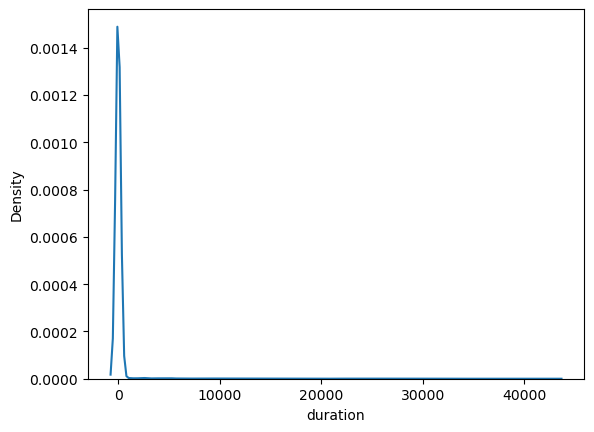

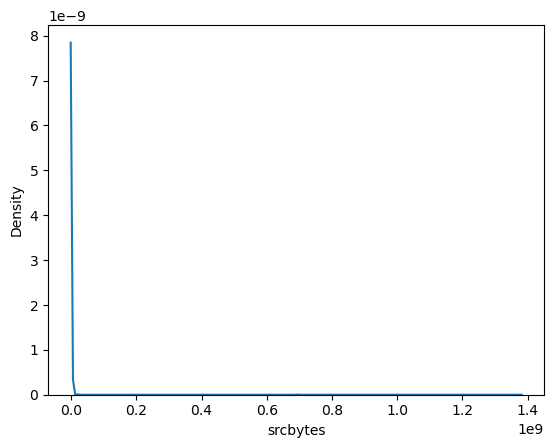

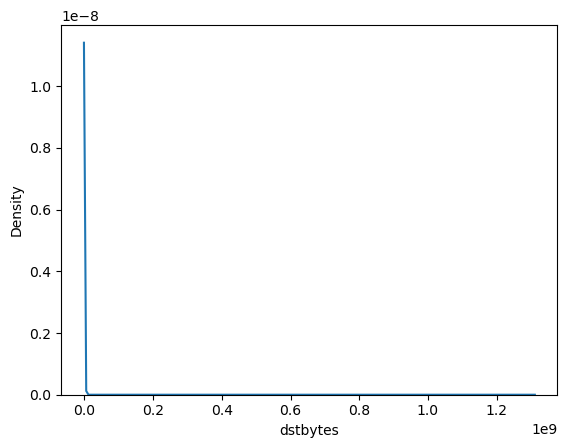

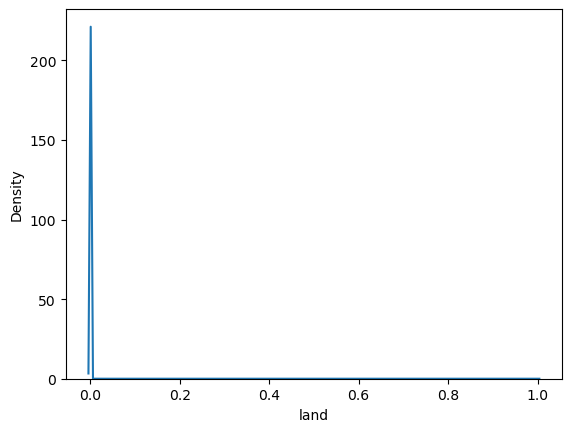

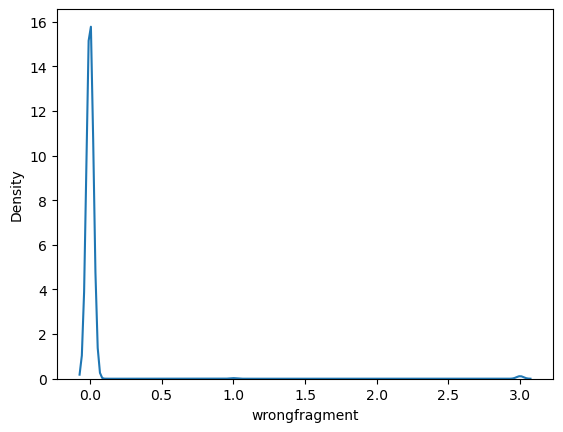

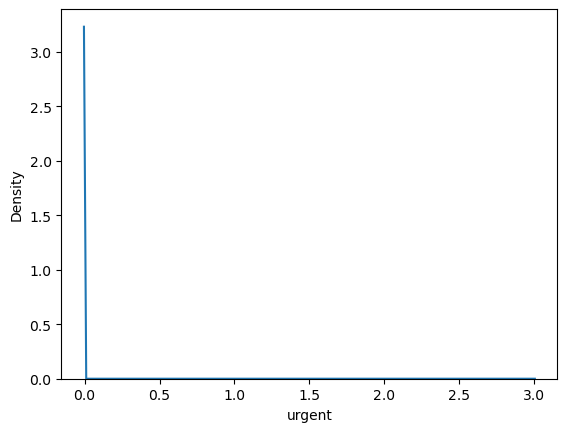

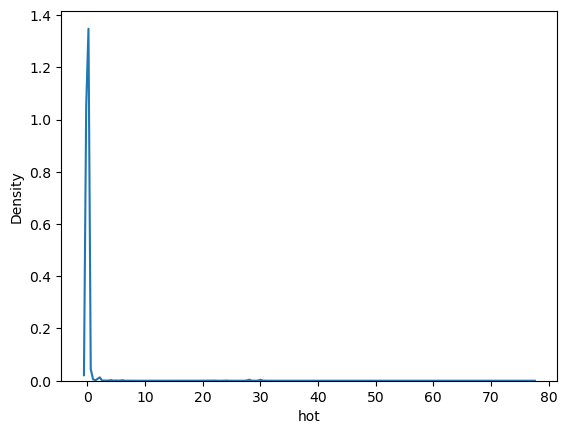

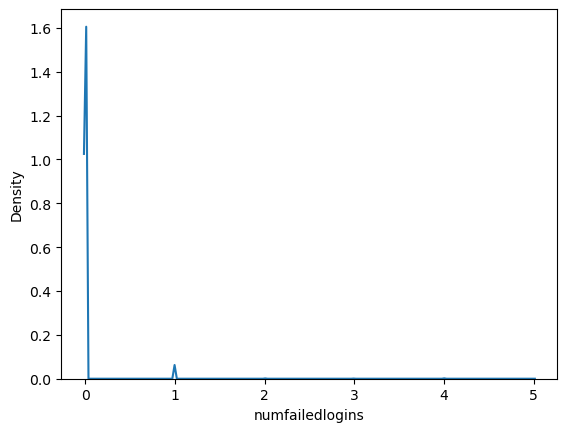

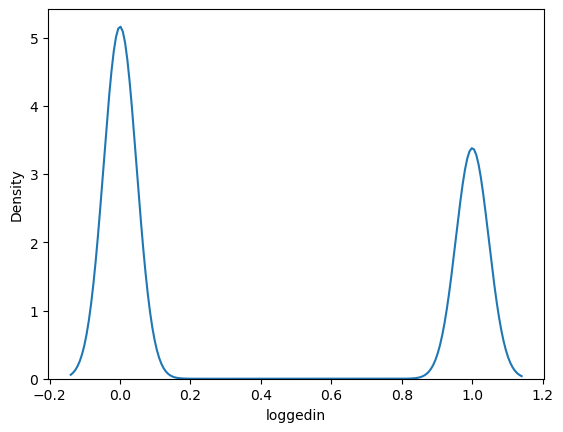

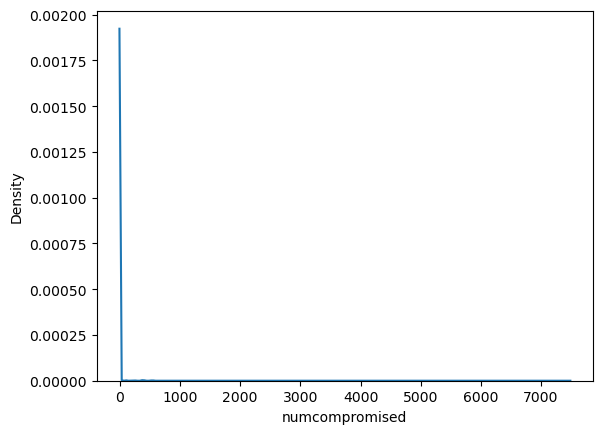

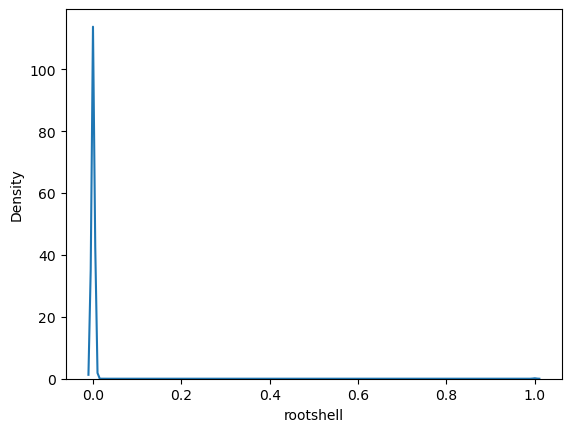

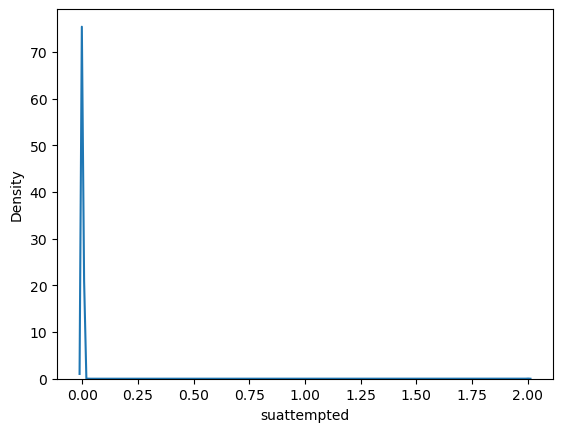

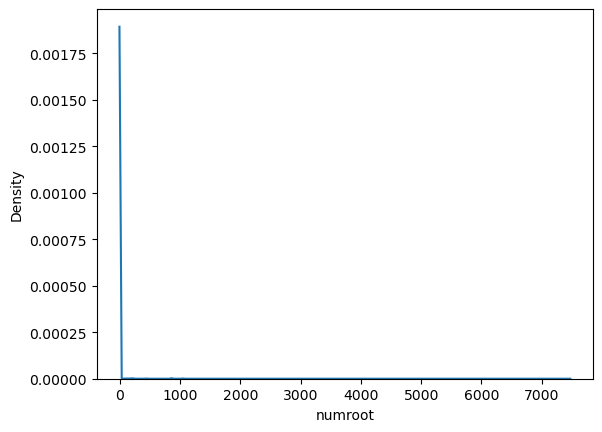

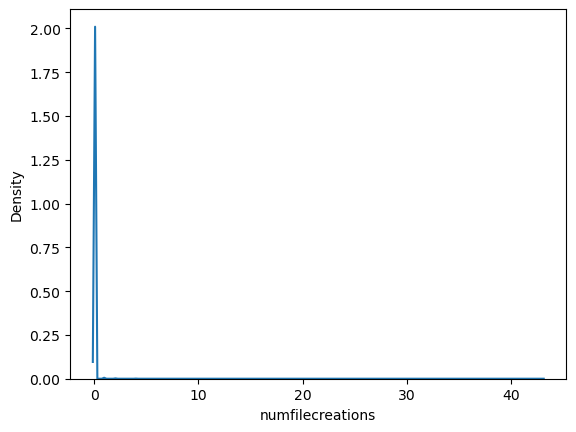

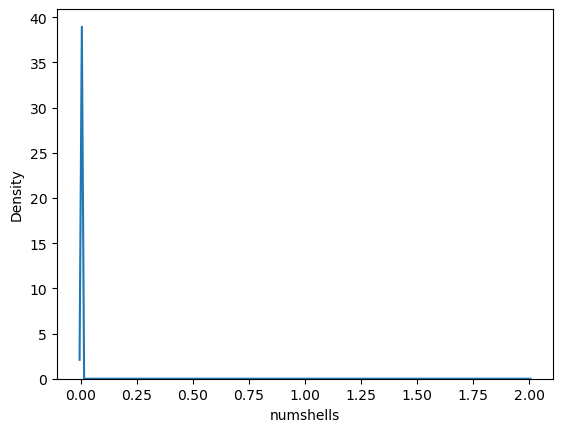

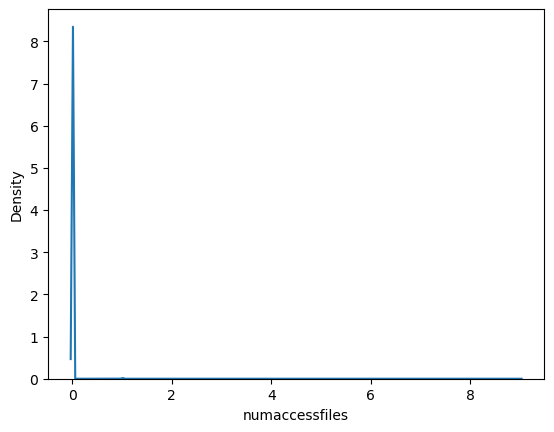

C:\Users\zsims\AppData\Local\Temp\ipykernel_43932\3017788369.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[col])


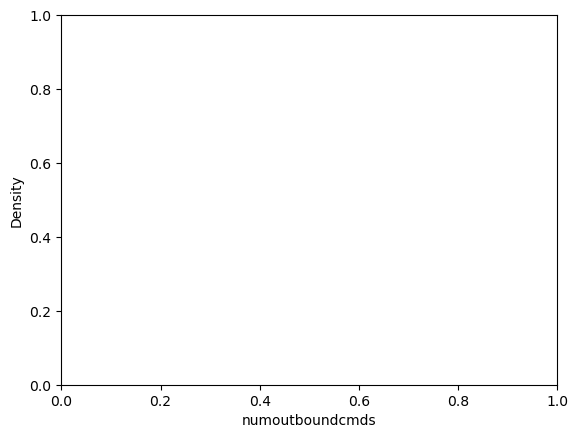

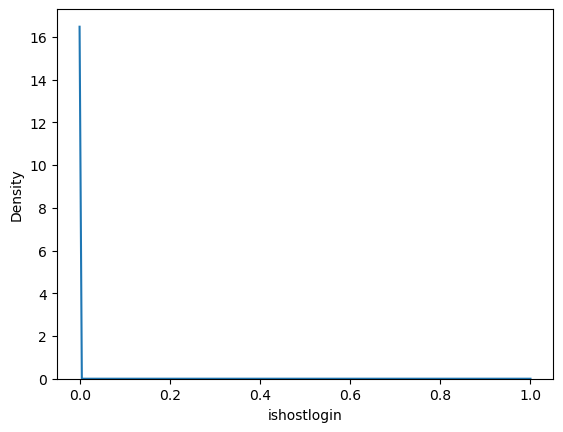

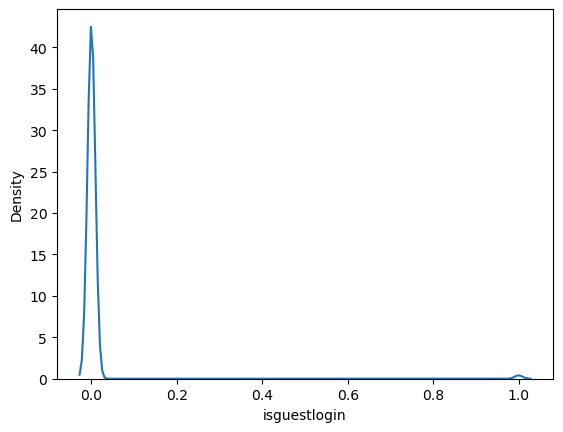

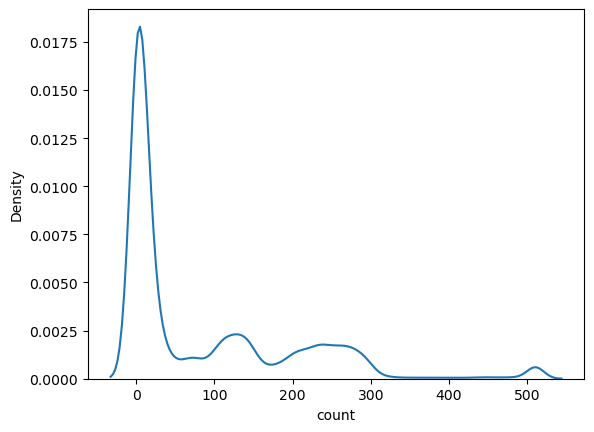

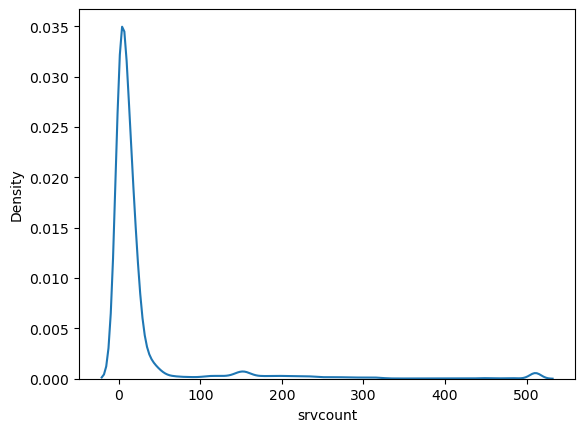

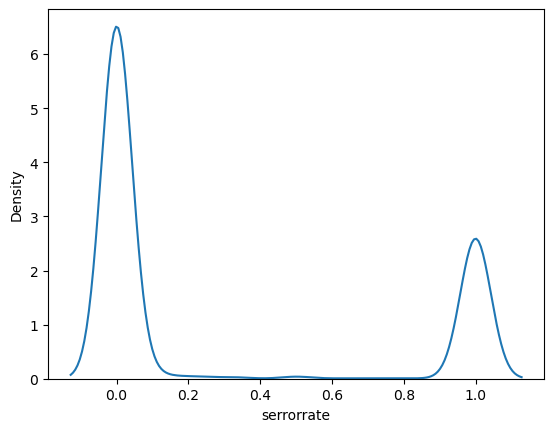

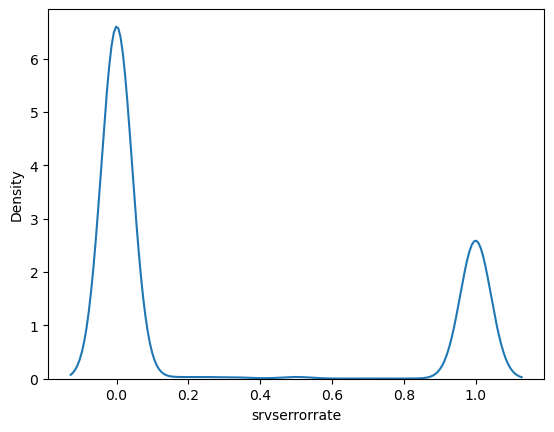

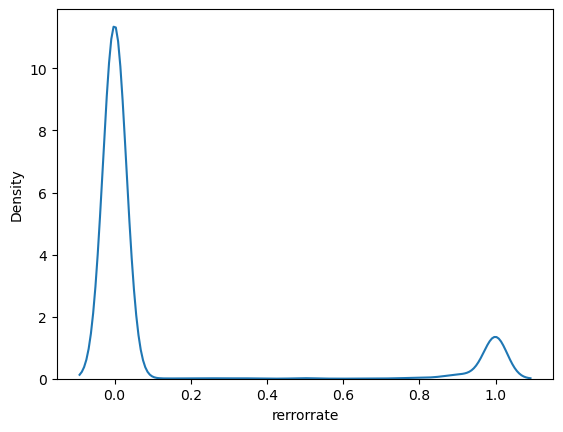

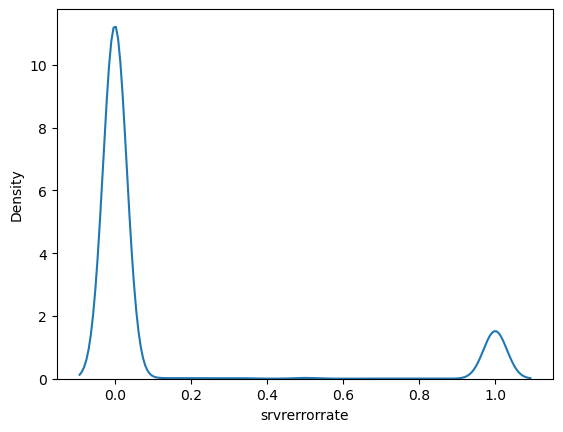

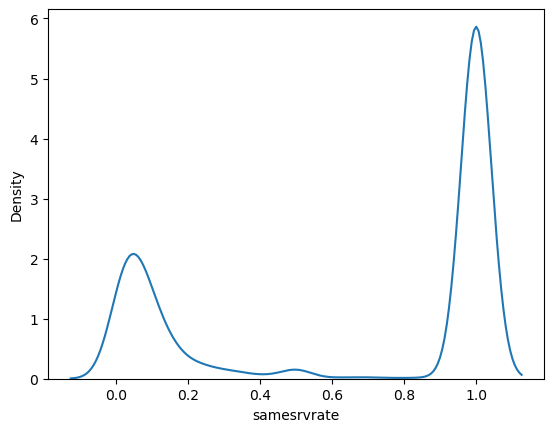

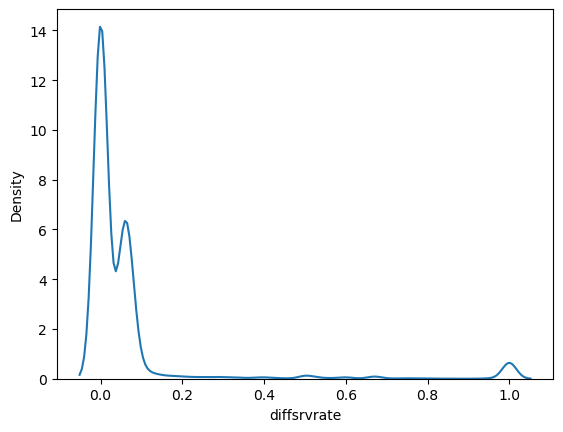

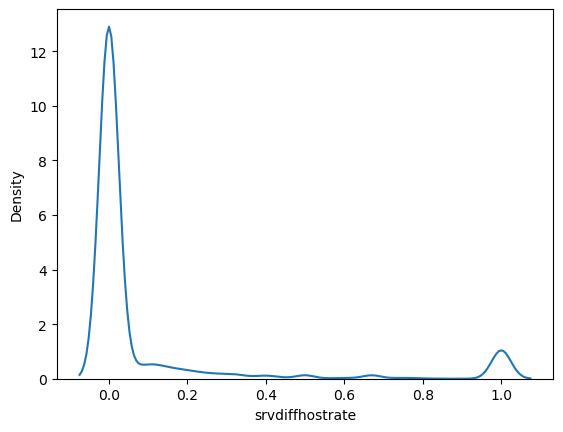

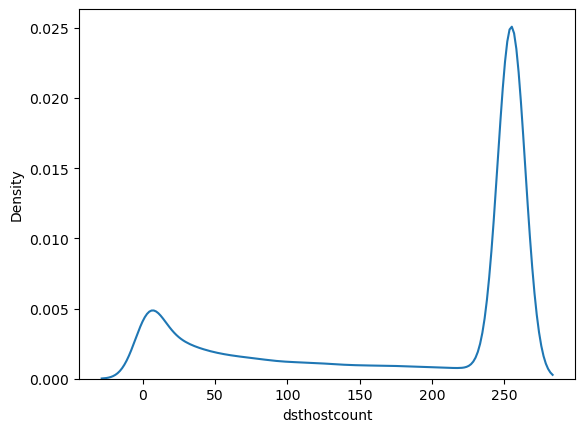

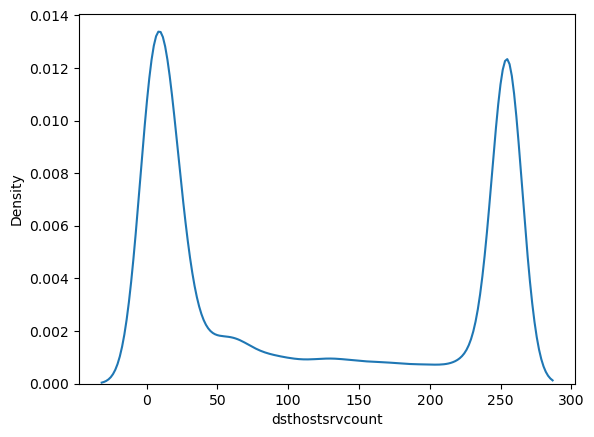

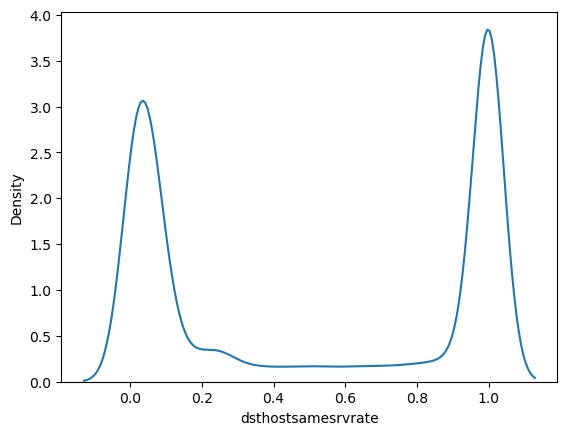

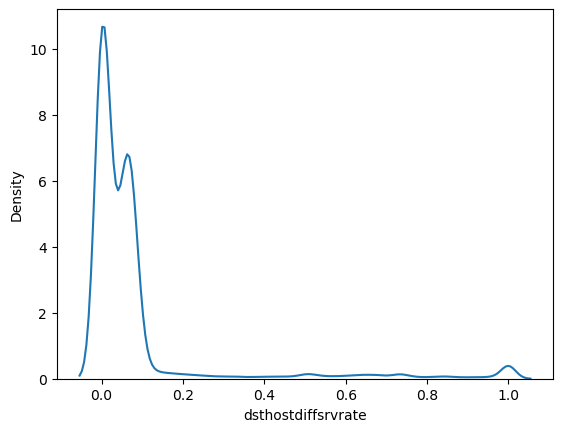

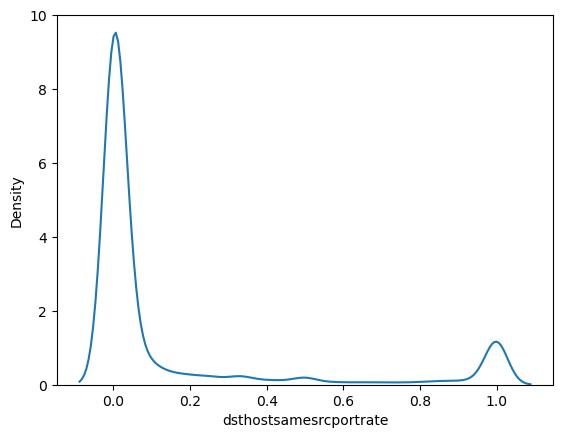

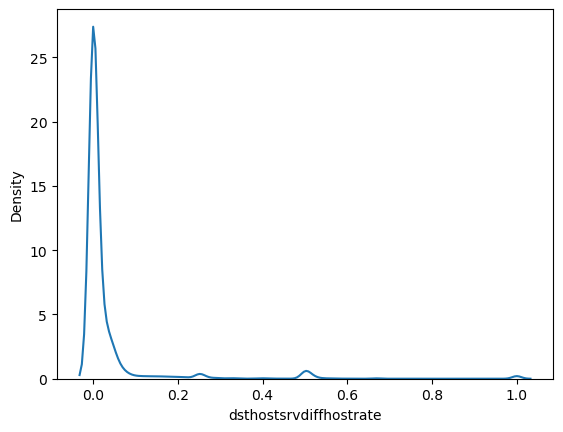

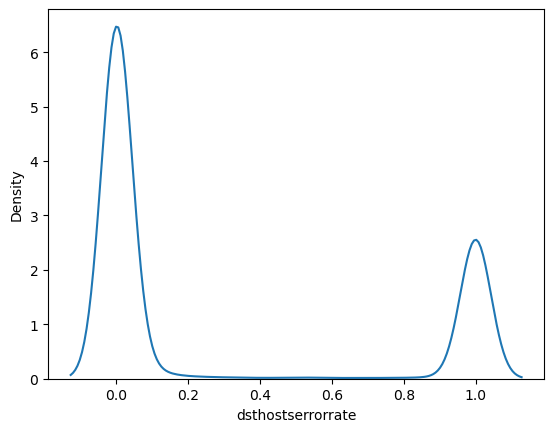

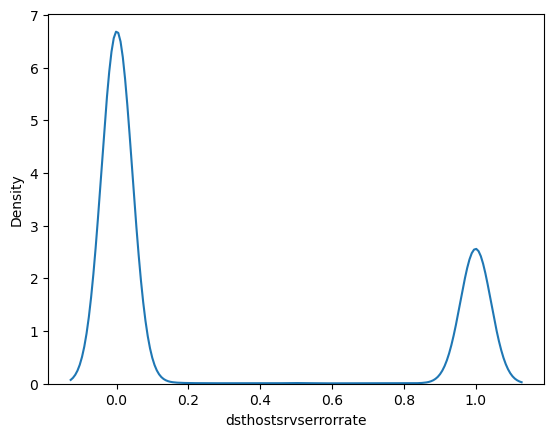

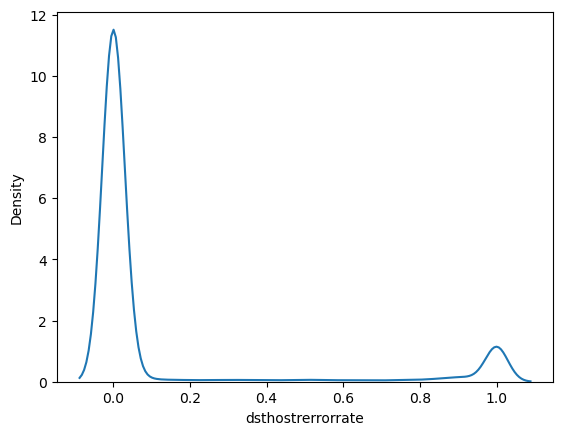

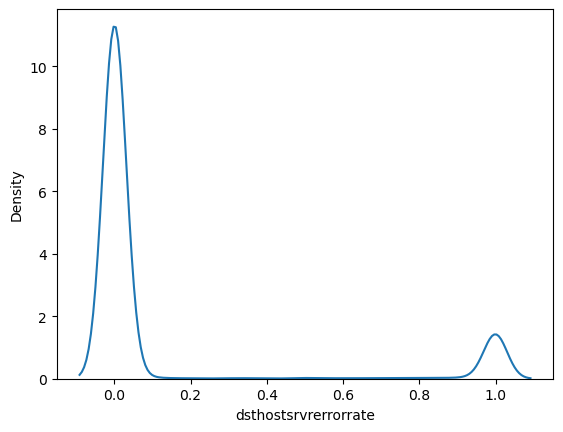

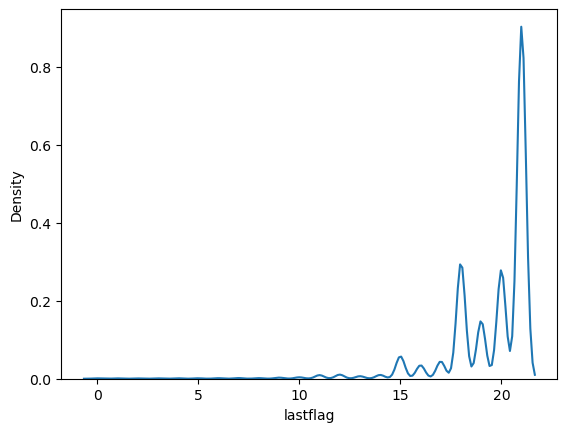

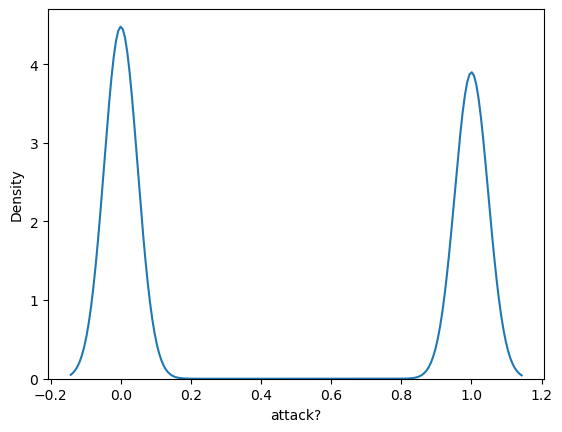

In [11]:
for col in df.describe().columns:
    sns.kdeplot(df[col])
    plt.show()

## Box plot it all out

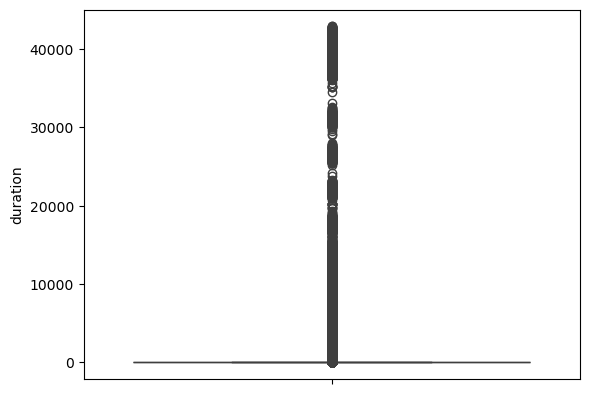

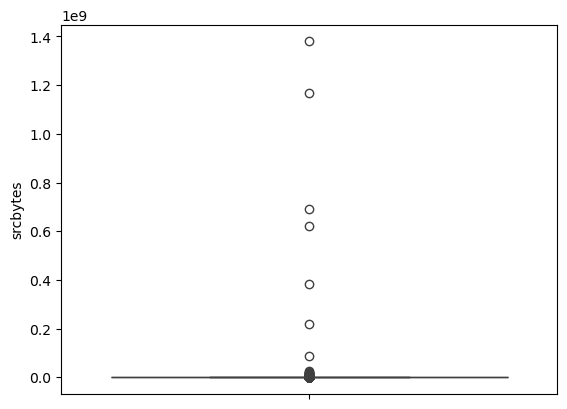

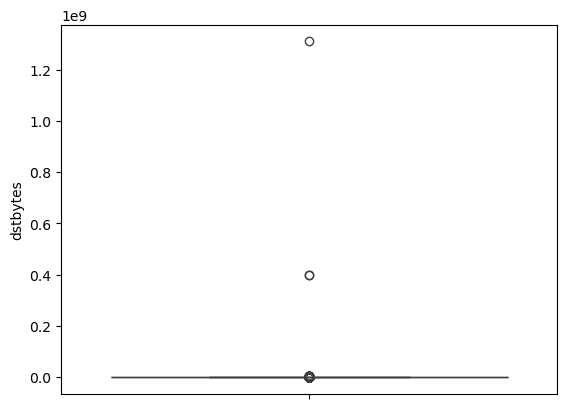

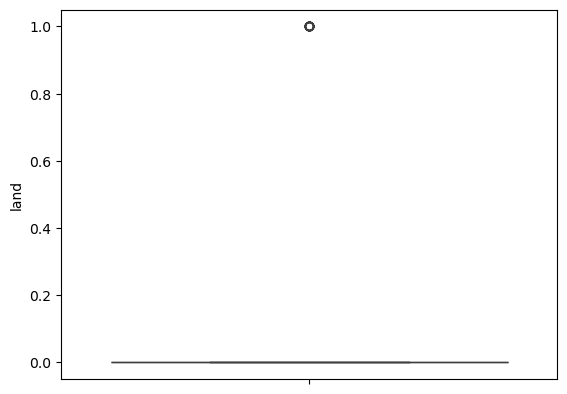

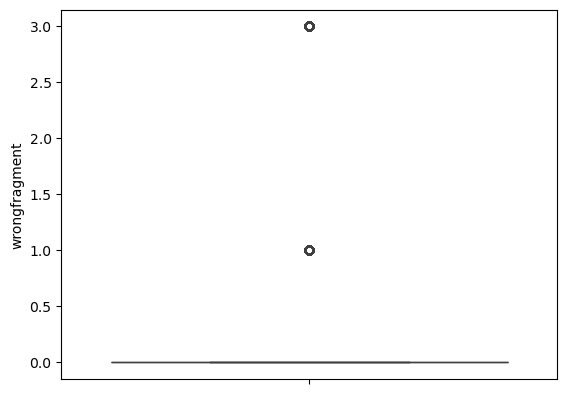

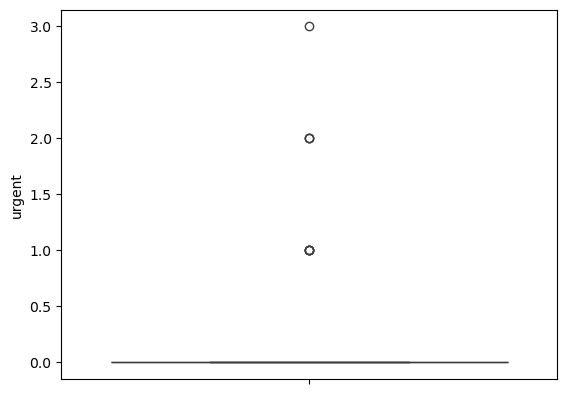

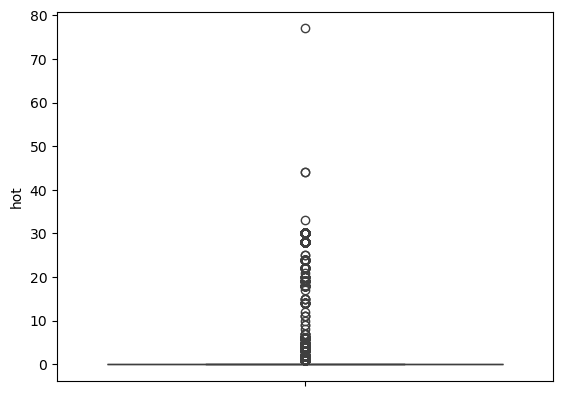

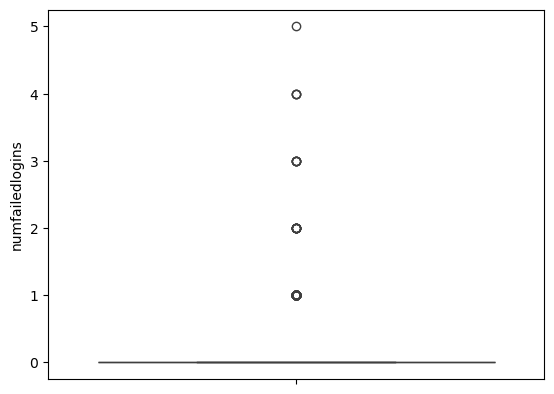

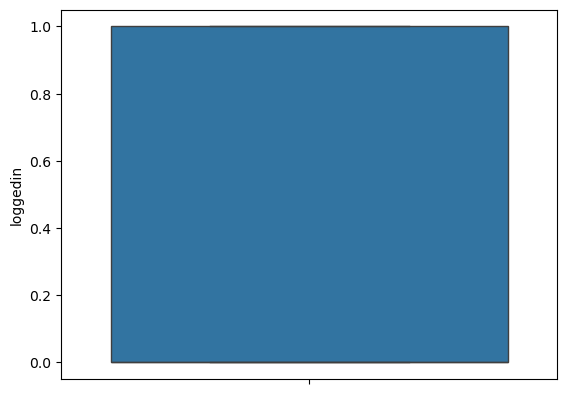

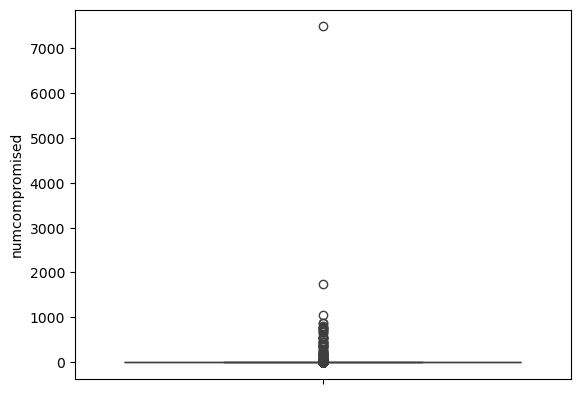

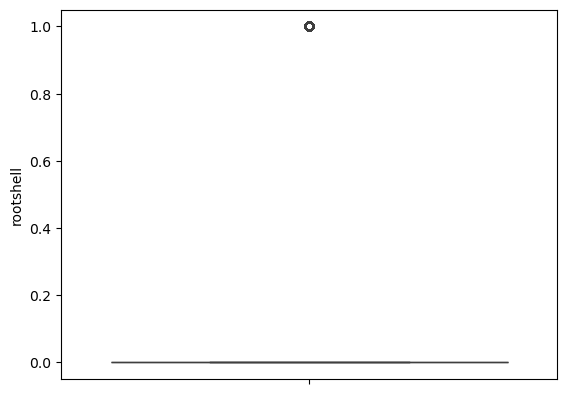

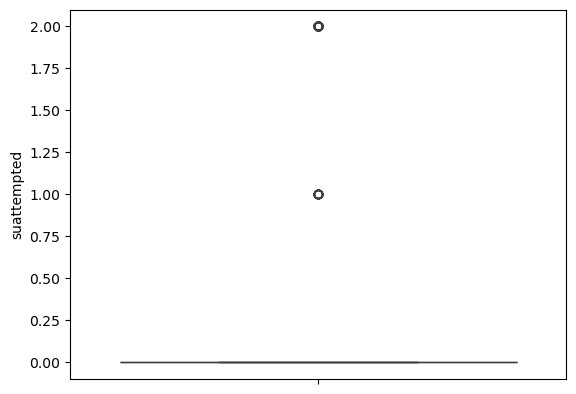

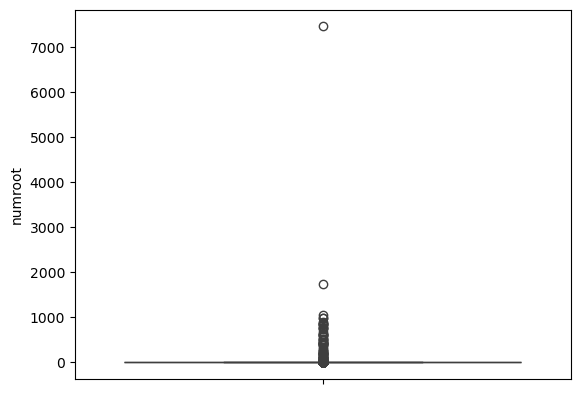

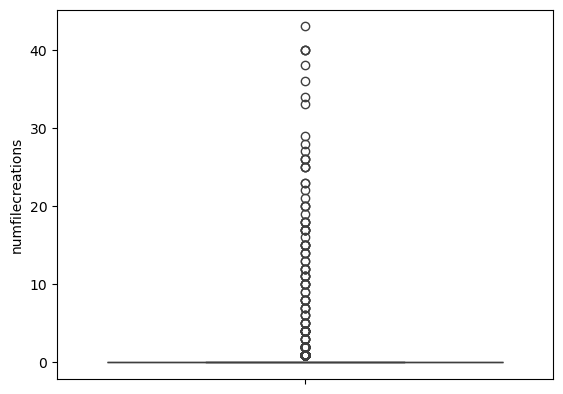

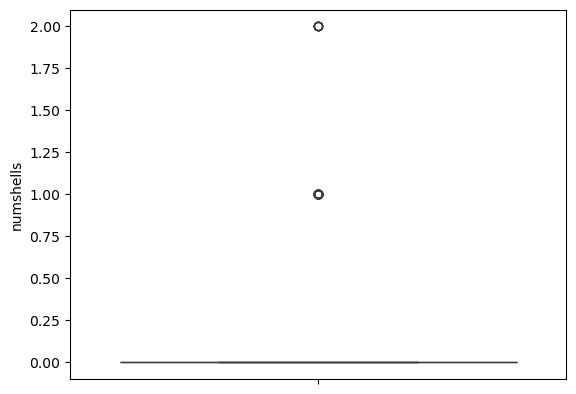

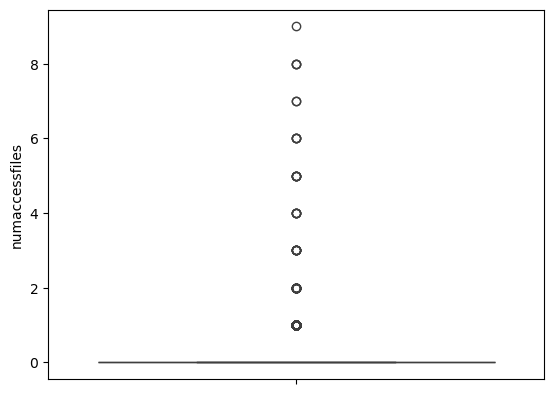

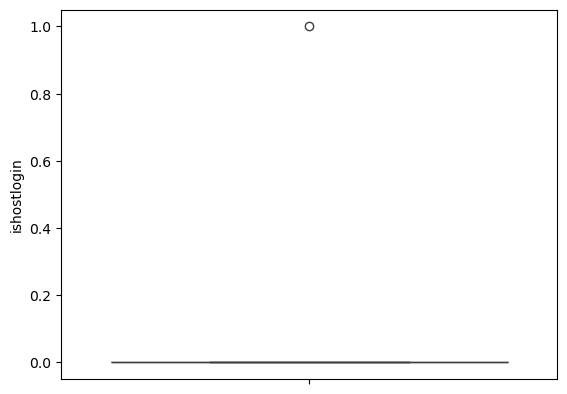

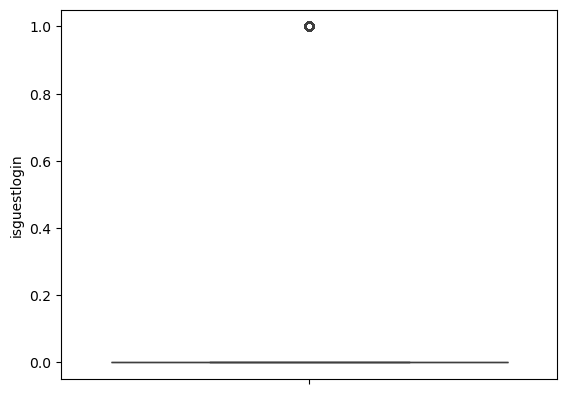

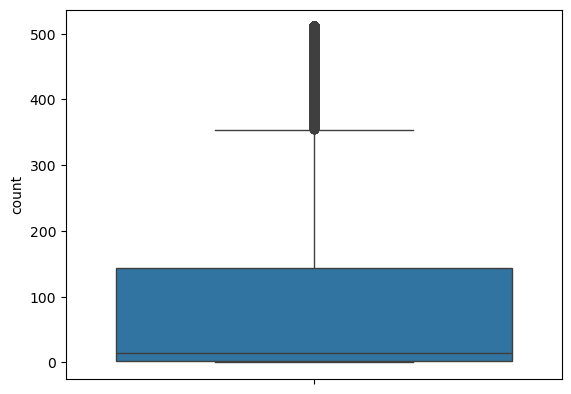

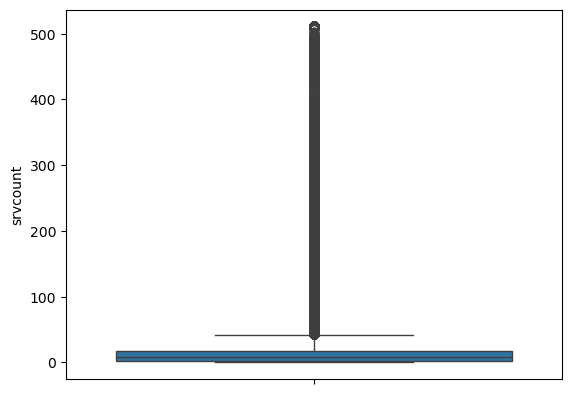

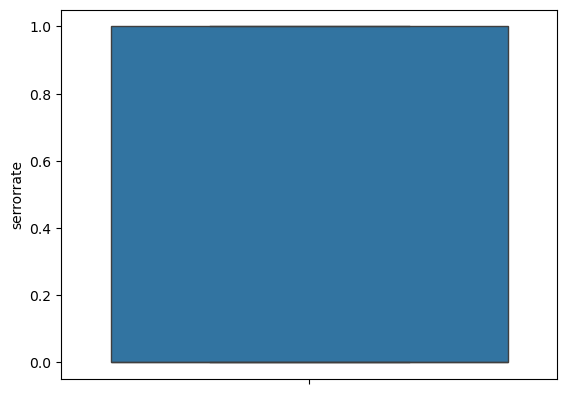

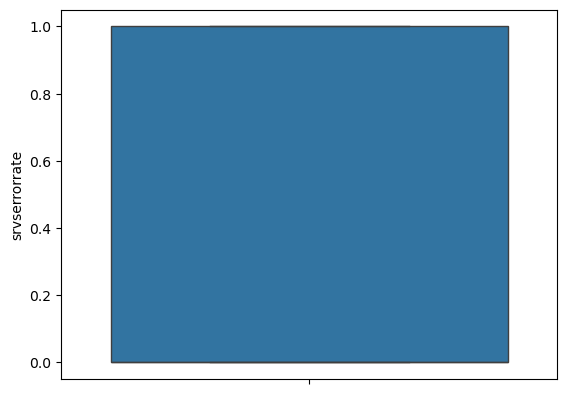

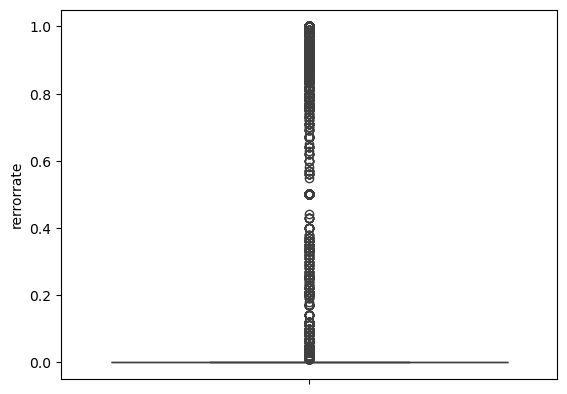

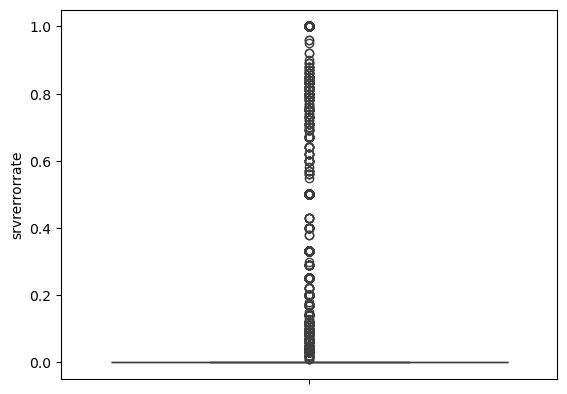

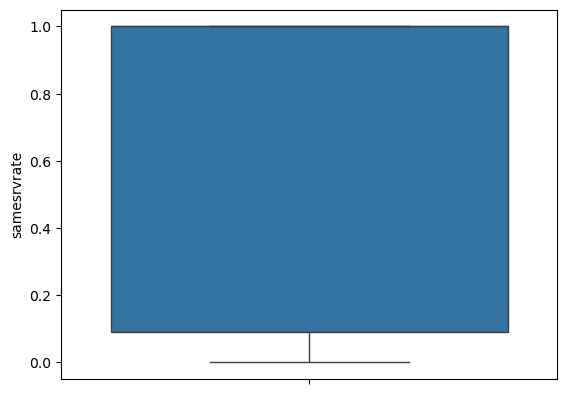

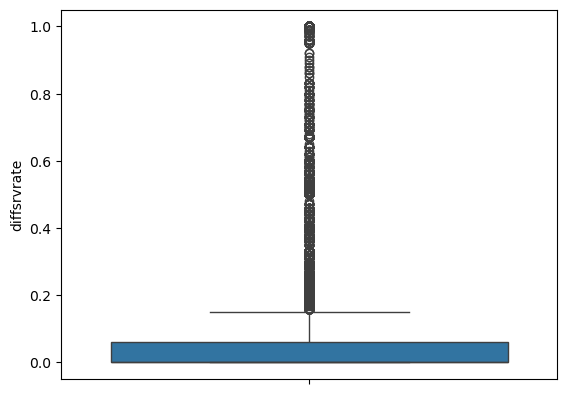

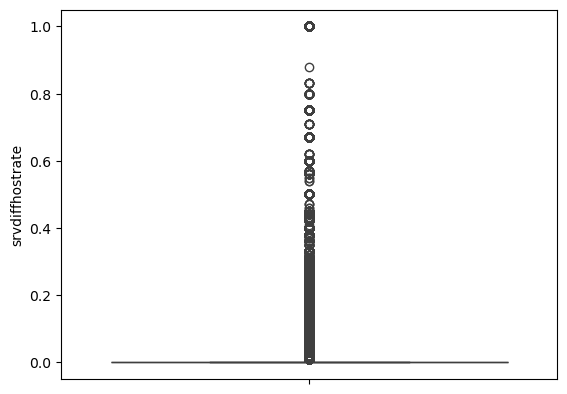

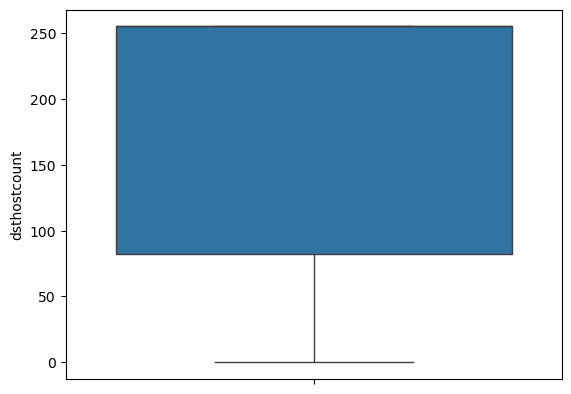

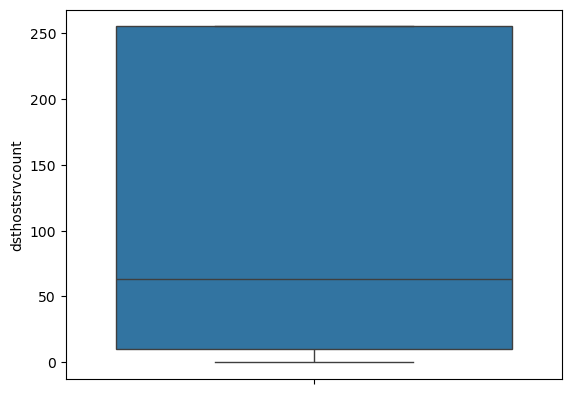

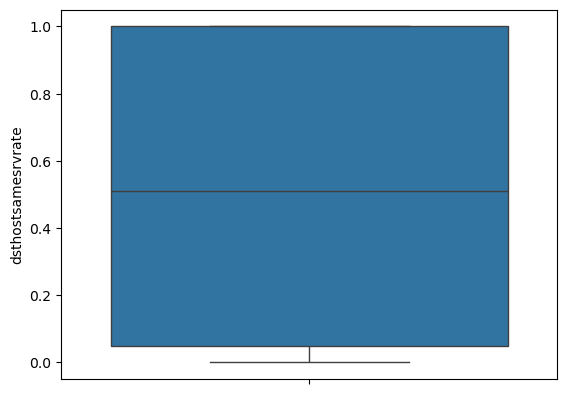

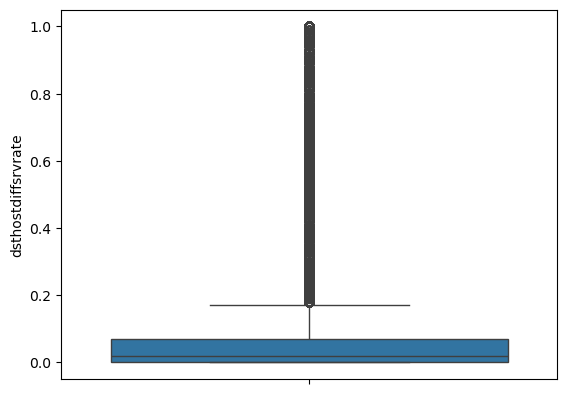

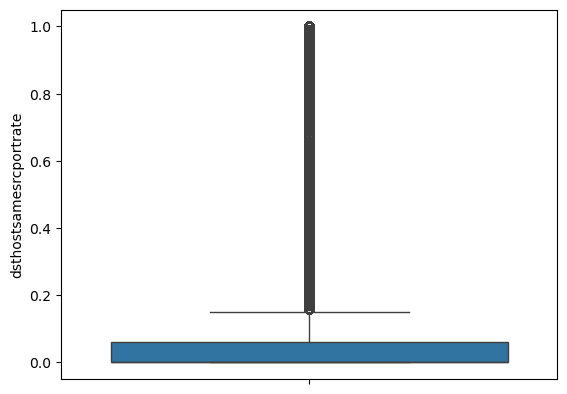

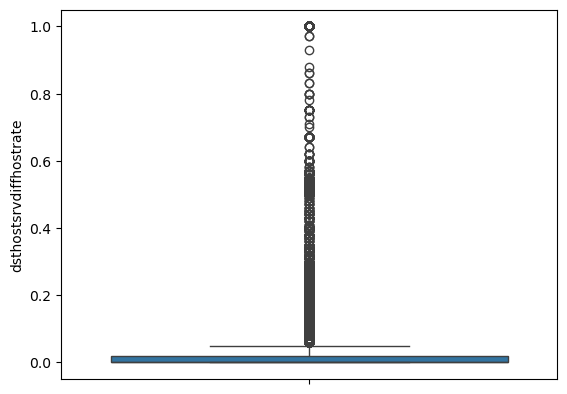

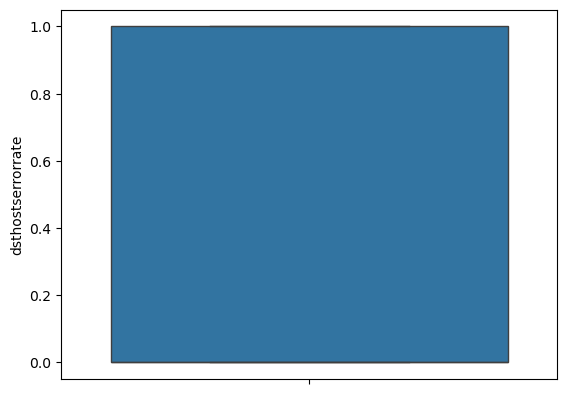

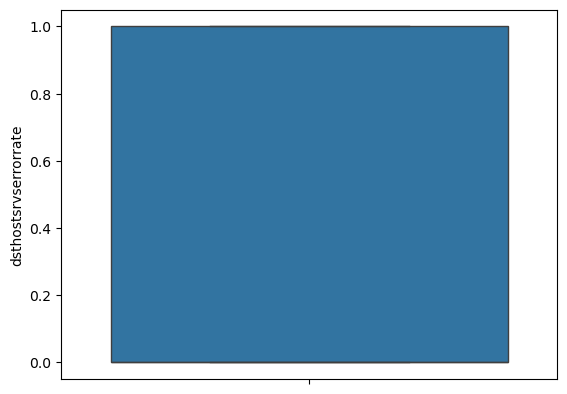

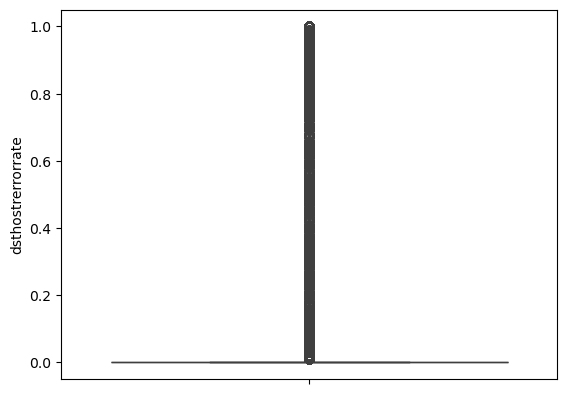

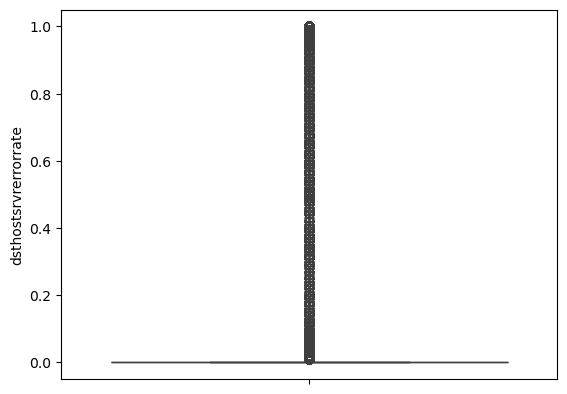

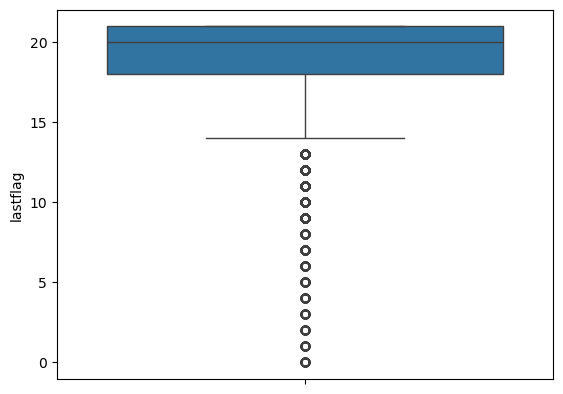

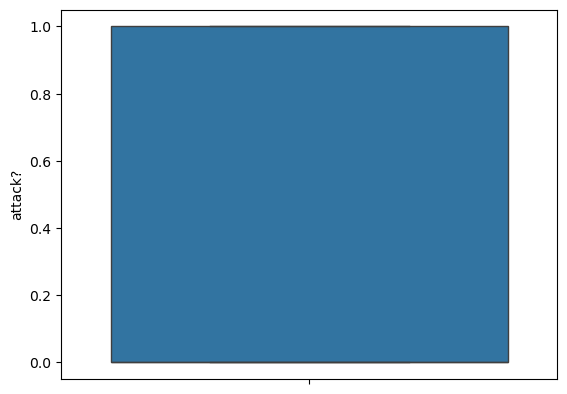

In [20]:
for col in df.describe().columns:
    sns.boxplot(df[col])
    plt.show()

## Correlation Analysis 

<Axes: >

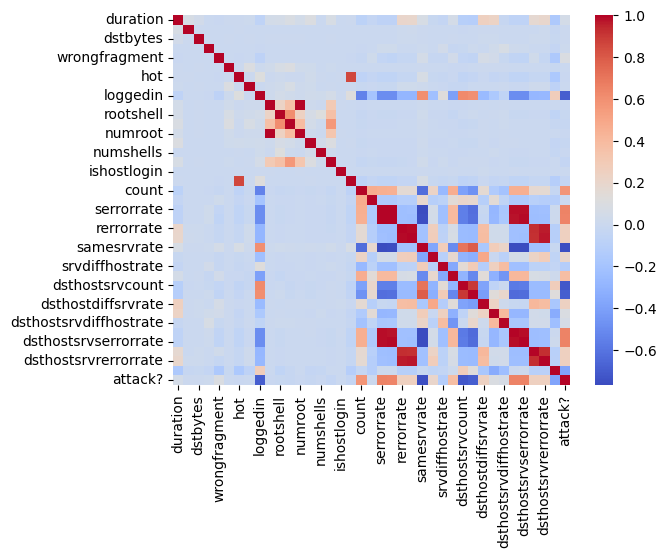

In [22]:
## Heatmap showing correlation between each column
numeric_col = df.describe().columns
sns.heatmap(df[numeric_col].corr(), cmap = 'coolwarm')

## Check for missing values

In [23]:
df.isna().sum().sum()

np.int64(0)

## Correlation Analysis

In [24]:
cor = df[numeric_col].corr()
cor

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,attack?
duration,1.000000,0.070737,0.034878,-0.001553,-0.009866,0.003830,0.000705,0.009528,-0.064218,0.042679,...,-0.116005,0.254195,0.228737,-0.026669,-0.064948,-0.064361,0.173815,0.199024,-0.156311,0.048785
srcbytes,0.070737,1.000000,0.000204,-0.000109,-0.000693,-0.000059,0.000295,-0.000208,-0.003353,-0.000086,...,-0.006572,0.000900,0.000431,-0.001655,-0.004503,-0.003397,-0.001468,0.012449,-0.022592,0.005921
dstbytes,0.034878,0.000204,1.000000,-0.000069,-0.000440,0.000248,-0.000344,0.000504,-0.002894,0.001233,...,-0.004424,0.011031,0.011747,-0.001281,-0.003024,-0.002944,0.011729,0.011223,-0.018076,0.004118
land,-0.001553,-0.000109,-0.000069,1.000000,-0.001261,-0.000109,-0.001340,-0.000381,-0.011402,-0.000164,...,0.011597,-0.004516,0.033851,0.070474,0.019840,0.012276,-0.005222,-0.005303,-0.037038,0.007191
wrongfragment,-0.009866,-0.000693,-0.000440,-0.001261,1.000000,-0.000692,-0.008508,-0.002418,-0.072418,-0.001044,...,-0.048733,0.059797,0.037177,-0.016252,-0.051917,-0.055917,0.028890,-0.033682,-0.157130,0.095905
urgent,0.003830,-0.000059,0.000248,-0.000109,-0.000692,1.000000,0.000293,0.097507,0.007299,0.033329,...,-0.004489,0.006840,0.002741,0.005176,-0.004749,-0.004834,-0.002999,-0.002912,-0.016411,-0.002787
hot,0.000705,0.000295,-0.000344,-0.001340,-0.008508,0.000293,1.000000,0.003715,0.116435,0.002014,...,-0.036293,-0.012293,-0.034536,-0.024715,-0.058222,-0.058214,-0.030555,-0.031670,-0.160013,-0.013083
numfailedlogins,0.009528,-0.000208,0.000504,-0.000381,-0.002418,0.097507,0.003715,1.000000,-0.006439,0.019085,...,-0.001576,-0.001945,-0.005526,0.003302,-0.011648,-0.012299,0.018660,0.017359,-0.073178,-0.003755
loggedin,-0.064218,-0.003353,-0.002894,-0.011402,-0.072418,0.007299,0.116435,-0.006439,1.000000,0.014413,...,0.604058,-0.256065,-0.160994,-0.055953,-0.491478,-0.493264,-0.275972,-0.272806,0.269818,-0.690171
numcompromised,0.042679,-0.000086,0.001233,-0.000164,-0.001044,0.033329,0.002014,0.019085,0.014413,1.000000,...,-0.004995,0.002981,-0.002045,0.004252,-0.004377,-0.004898,-0.003647,-0.003219,-0.006101,-0.010198


In [25]:
## Let us see which columns have the highest correlation with other columns one by one.
for col in cor.columns:
    print(cor[col].sort_values(ascending = False)[1:4])
    print("-------------------------------------")

dsthostdiffsrvrate        0.254195
dsthostsamesrcportrate    0.228737
rerrorrate                0.200682
Name: duration, dtype: float64
-------------------------------------
duration         0.070737
srvrerrorrate    0.013975
rerrorrate       0.013782
Name: srcbytes, dtype: float64
-------------------------------------
duration                  0.034878
dsthostsamesrcportrate    0.011747
dsthostrerrorrate         0.011729
Name: dstbytes, dtype: float64
-------------------------------------
dsthostsrvdiffhostrate    0.070474
srvdiffhostrate           0.038102
dsthostsamesrcportrate    0.033851
Name: land, dtype: float64
-------------------------------------
attack?               0.095905
dsthostdiffsrvrate    0.059797
samesrvrate           0.054759
Name: wrongfragment, dtype: float64
-------------------------------------
suattempted        0.097710
numfailedlogins    0.097507
rootshell          0.075199
Name: urgent, dtype: float64
-------------------------------------
isguestlogin    0

In [26]:
for col in cor.columns:
    print(cor[col].sort_values(ascending = False)[-4:-1])
    print("-------------------------------------")

count                -0.079042
dsthostsrvcount      -0.109776
dsthostsamesrvrate   -0.116005
Name: duration, dtype: float64
-------------------------------------
dsthostcount         -0.005791
dsthostsamesrvrate   -0.006572
dsthostsrvcount      -0.006861
Name: srcbytes, dtype: float64
-------------------------------------
count                -0.003543
dsthostsrvcount      -0.004224
dsthostsamesrvrate   -0.004424
Name: dstbytes, dtype: float64
-------------------------------------
loggedin          -0.011402
dsthostsrvcount   -0.014159
dsthostcount      -0.025499
Name: land, dtype: float64
-------------------------------------
dsthostsrvserrorrate   -0.055917
srvserrorrate          -0.056549
loggedin               -0.072418
Name: wrongfragment, dtype: float64
-------------------------------------
count             -0.005615
dsthostcount      -0.006941
dsthostsrvcount   -0.007897
Name: urgent, dtype: float64
-------------------------------------
srvserrorrate   -0.058713
serrorrate     

## Feature Engineering

In [28]:
df

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag,attack?
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,0
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,1
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21,0
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18,0
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,1


In [29]:
df.describe().iloc[:, 27:]

,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,attack?
count,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060,0.465417
std,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503,0.498805
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000
50%,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000
75%,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000,1.000000
max,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000,1.000000


In [31]:
flag_col = ['flag', 'serrorrate', 'srvserrorrate', 'rerrorrate', 'srvrerrorrate', 'dsthostserrorrate', 'dsthostsrvserrorrate', 'dsthostrerrorrate', 'dsthostsrvrerrorrate']

In [32]:
# We first split the data and then do data preprocessing to avoid data leakage
x_train, x_test, y_train, y_test = train_test_split(df[flag_col], df['attack?'], train_size = 0.8)

In [33]:
# Target encoding of categoric column - 'flag'
ab = pd.concat([x_train['flag'], y_train], axis = 1)
ab

,flag,attack?
92417,SF,0
19273,SF,0
17616,SF,0
71179,SF,1
28176,SF,0
...,...,...
88135,SF,0
19664,S0,1
61112,REJ,1
125856,S0,1


In [34]:
ab = ab.groupby('flag')['attack?'].mean().reset_index()
ab

,flag,attack?
0,OTH,0.833333
1,REJ,0.759183
2,RSTO,0.860958
3,RSTOS0,1.000000
4,RSTR,0.936359
5,S0,0.989852
6,S1,0.013605
7,S2,0.050000
8,S3,0.058824
9,SF,0.153376


In [35]:
x_train = x_train.merge(ab, how = 'left', left_on = 'flag', right_on = 'flag').drop(columns = 'flag').rename(columns = {'attack?': 'flag'})
x_train

,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,flag
0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.153376
1,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.153376
2,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.153376
3,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.153376
4,0.33,0.25,0.0,0.0,0.33,0.0,0.0,0.00,0.153376
...,...,...,...,...,...,...,...,...,...
100773,0.00,0.00,0.0,0.0,0.01,0.0,0.0,0.02,0.153376
100774,1.00,1.00,0.0,0.0,1.00,1.0,0.0,0.00,0.989852
100775,0.00,0.00,1.0,1.0,0.00,0.0,0.3,1.00,0.759183
100776,1.00,1.00,0.0,0.0,1.00,1.0,0.0,0.00,0.989852
